# Pandas
Primarily a data analysis library which has matured quite a lot recently. Pandas is able to solve many data handling
problems with high level data structures and manipulation tools built for and around Numpy centric activities.

## Introducing Pandas Objects

1. At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.

2. Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are.
    - Three fundamental Pandas data structures:
        1. ``Series``
        2. ``DataFrame``
        3. ``Index``.

## Series
Series is a one dimensional array like object containing an array of data and data associated labels called index. lets 
see an example

In [1]:
import numpy as np
import pandas as pd

lets Give the Series our custom labels

In [2]:
data=[4,8,9,-1]
dataSeries=pd.Series(data)


print (dataSeries)
print ()
print ("Indexes of the series : ", dataSeries.index)
print()
print ("Values : ", dataSeries.values)

0    4
1    8
2    9
3   -1
dtype: int64

Indexes of the series :  RangeIndex(start=0, stop=4, step=1)

Values :  [ 4  8  9 -1]


In [3]:
data=[4,8,9,-1]
labels=['a','b','c','d']
dataSeries=pd.Series(data=data,index=labels)

print (dataSeries)
print ()
print ("Indexes of the series : ", dataSeries.index)
print()
print ("Values : ", dataSeries.values)

a    4
b    8
c    9
d   -1
dtype: int64

Indexes of the series :  Index(['a', 'b', 'c', 'd'], dtype='object')

Values :  [ 4  8  9 -1]


### Accessing Values

We can access the values using the indexes. In the example above we used```[a,b,c,d]``` as indexes so we can use them to access values : 

In [4]:
print ("Value ad index 'a' is : ", dataSeries['a'])
print ()
idx=['a','c']
print ("Values as indexes", idx, " are : ")
print (dataSeries[idx])

Value ad index 'a' is :  4

Values as indexes ['a', 'c']  are : 
a    4
c    9
dtype: int64


Lets try some numpy operation and see there results

In [5]:
print (dataSeries[dataSeries<5])

a    4
d   -1
dtype: int64


In [6]:
print (dataSeries*2)

a     8
b    16
c    18
d    -2
dtype: int64


In [7]:
print (np.exp(dataSeries))

a      54.598150
b    2980.957987
c    8103.083928
d       0.367879
dtype: float64


In [8]:
print (4 in dataSeries)

False


In [9]:
print ('c' in dataSeries)

True


### Series as specialized dictionary

In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [10]:
sdata={'Ohio':'arslan' , 'Texas':7100 , 'Oregon': 1600 , 'Utah':5000 }

sdata=pd.Series(sdata)

print (sdata)


Ohio      arslan
Texas       7100
Oregon      1600
Utah        5000
dtype: object


In [11]:
labels=['California','Ohio','Oregon','Texas']
adata=pd.Series(sdata,index=labels)
print (adata)

California       NaN
Ohio          arslan
Oregon          1600
Texas           7100
dtype: object


pd.isnull and pd.notnull functions must be used to detect the missing value

In [12]:
pd.isnull(adata)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [13]:
pd.notnull(adata)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [14]:
adata+sdata

California             NaN
Ohio          arslanarslan
Oregon                3200
Texas                14200
Utah                   NaN
dtype: object

## Dataframe
Dataframe is similar to a data table like a spreadsheet containing ordered collection of columns; each of which can be a 
different type. Dataframe has both a row and column index. Dataframe can be though of a dictionary of Series. Data frame store data internally in two dimensional blocks.   

In [15]:
data={
        'state': ['Ohio','Ohio','Ohio','Nevada','Nevada'],
        'year': [2000,2001,2002,2001,2002],
        'pop': [1.5,1.7,3.6,2.4,2.9]
     }
dataDF=pd.DataFrame(data)
print (dataDF)

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9


If you specify a sequence of columns, the dataframe will be exactly what you pass

In [16]:
dataDF=pd.DataFrame(data,columns=['year','state','pop'])
print (dataDF)


   year   state  pop
0  2000    Ohio  1.5
1  2001    Ohio  1.7
2  2002    Ohio  3.6
3  2001  Nevada  2.4
4  2002  Nevada  2.9


if you pass a column that does not exists in data it will appear with NA values.

In [17]:
dataDF=pd.DataFrame(data,columns=['year','state','pop','debt'],index=['one','two','three','four','five'])
print (dataDF)

       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN


### Indexing

You can access the coloumns in a dataframe using either as an attribute, or as a key value pair
- As attribute

In [18]:
dataDF.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

- As Key-Value pair

In [19]:
dataDF['year']

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

* You can access the rows using the _iloc_ utility

In [20]:
dataDF.iloc[2]

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [21]:
# Row selecting using Boolean Indexing

dataDF[dataDF['year']==2002]

,year,state,pop,debt
three,2002,Ohio,3.6,NaN
five,2002,Nevada,2.9,NaN


- A new coloumn can be added by giving same value as all rows as follows

In [22]:
dataDF['debt']=16.5
dataDF

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


- Or if you want different values for each row

In [23]:
val=pd.Series(data=[-1.2,-1.5,-1.7,2],index=['two','four','five','one'])
dataDF['debt']=val
dataDF

,year,state,pop,debt
one,2000,Ohio,1.5,2.0
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


- Adding a new column on the fly by simpling assigning a column. The del keyword will delete the specified column.

In [24]:
dataDF['east']= dataDF.state=='Ohio'
dataDF

,year,state,pop,debt,east
one,2000,Ohio,1.5,2.0,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


**P.S : ** In the example above _dataDF.state=='Ohio'_ is creating a boolean array and it is being assigned to a new coloumn in data frame using _dataDF['eastern']= dataDF.state=='Ohio'_ . It is to be noted that "Eastern" coloumn did not exist prior to this statement rather is created on the fly.  

- We can also delete a coloumn using the _del_ keyword

In [25]:
del dataDF['east']
# dataDF.drop(dataDF['east'])
dataDF

,year,state,pop,debt
one,2000,Ohio,1.5,2.0
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


- A row can be deleted using _drop_ function

In [26]:
dataDF.drop('two')

,year,state,pop,debt
one,2000,Ohio,1.5,2.0
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


- We can take the transpose of a dataframe as following 

In [27]:
dataDF.T

,one,two,three,four,five
year,2000,2001,2002,2001,2002
state,Ohio,Ohio,Ohio,Nevada,Nevada
pop,1.5,1.7,3.6,2.4,2.9
debt,2.0,-1.2,NaN,-1.5,-1.7


- The reindex function of pandas can re-arrange the rows and coloumns 

In [28]:
dataDF.reindex(index=['five','three','two','four','one'])

,year,state,pop,debt
five,2002,Nevada,2.9,-1.7
three,2002,Ohio,3.6,NaN
two,2001,Ohio,1.7,-1.2
four,2001,Nevada,2.4,-1.5
one,2000,Ohio,1.5,2.0


In [29]:
dataDF.reindex(index=['five','three','two','four','one'],columns=['debt','state','year','pop'])

,debt,state,year,pop
five,-1.7,Nevada,2002,2.9
three,NaN,Ohio,2002,3.6
two,-1.2,Ohio,2001,1.7
four,-1.5,Nevada,2001,2.4
one,2.0,Ohio,2000,1.5


- Applying custom functions on pandas

In [30]:
f=lambda x:x-1
dataDF['year'].apply(f)

one      1999
two      2000
three    2001
four     2000
five     2001
Name: year, dtype: int64

In [31]:
dataDF['pop'].apply(f)

one      0.5
two      0.7
three    2.6
four     1.4
five     1.9
Name: pop, dtype: float64

### Sorting in pandas !

- We can sort a dataframe on the basis of index or values

In [32]:
dataDF.sort_index()

,year,state,pop,debt
five,2002,Nevada,2.9,-1.7
four,2001,Nevada,2.4,-1.5
one,2000,Ohio,1.5,2.0
three,2002,Ohio,3.6,NaN
two,2001,Ohio,1.7,-1.2


In [33]:
dataDF.sort_values('pop')

,year,state,pop,debt
one,2000,Ohio,1.5,2.0
two,2001,Ohio,1.7,-1.2
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
three,2002,Ohio,3.6,NaN


Data frame provide a lot of stats about the values. Lets see the overall statistical map of our dataframe

In [34]:
dataDF.describe()

,year,pop,debt
count,5.00000,5.000000,4.00000
mean,2001.20000,2.420000,-0.60000
std,0.83666,0.864292,1.74547
min,2000.00000,1.500000,-1.70000
25%,2001.00000,1.700000,-1.55000
50%,2001.00000,2.400000,-1.35000
75%,2002.00000,2.900000,-0.40000
max,2002.00000,3.600000,2.00000


- Of if you just want to apply one of the aggregation function

In [35]:
dataDF.mean()

year    2001.20
pop        2.42
debt      -0.60
dtype: float64

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

### Handling Missing data

In [36]:
data = pd.Series([ "Umman", np.nan,"Samad", None])
print (data )

0    Umman
1      NaN
2    Samad
3     None
dtype: object


**P.S**: Here NAN and None represent missing values, remember that if a value is not provided, pandas fill it with NAN

- One way is to just drop the missing values

In [37]:
data = data.dropna()
print (data)

0    Umman
2    Samad
dtype: object


- You can also fill al the NAN and None values with a default value 

In [38]:
data = pd.Series([ "Usman", np.nan,"Samad", None])

data = data.fillna("Default")
print (data)

0      Usman
1    Default
2      Samad
3    Default
dtype: object


**Note : ** IN case of numerical data, these values can be filled with mean or mode etc.

## GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called ``groupby`` operation.
The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: *split, apply, combine*.

![](figures/03.08-split-apply-combine.png)

This makes clear what the ``groupby`` accomplishes:

- The *split* step involves breaking up and grouping a ``DataFrame`` depending on the value of the specified key.
- The *apply* step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The *combine* step merges the results of these operations into an output array.

While this could certainly be done manually using some combination of the masking, aggregation, and merging commands covered earlier, an important realization is that *the intermediate splits do not need to be explicitly instantiated*. Rather, the ``GroupBy`` can (often) do this in a single pass over the data, updating the sum, mean, count, min, or other aggregate for each group along the way.
The power of the ``GroupBy`` is that it abstracts away these steps: the user need not think about *how* the computation is done under the hood, but rather thinks about the *operation as a whole*.

As a concrete example, let's take a look at using Pandas for the computation shown in this diagram.
We'll start by creating the input ``DataFrame``:

In [39]:
print(dataDF.groupby('year'))

Notice that what is returned is not a set of ``DataFrame``s, but a ``DataFrameGroupBy`` object.
This object is where the magic is: you can think of it as a special view of the ``DataFrame``, which is poised to dig into the groups but does no actual computation until the aggregation is applied.
This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

To produce a result, we can apply an aggregate to this ``DataFrameGroupBy`` object, which will perform the appropriate apply/combine steps to produce the desired result:

In [40]:
dataDF

,year,state,pop,debt
one,2000,Ohio,1.5,2.0
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [41]:
dataDF.groupby('year').sum()

,pop,debt
year,,
2000,1.5,2.0
2001,4.1,-2.7
2002,6.5,-1.7


In [42]:
dataDF.groupby('year').mean()

,pop,debt
year,,
2000,1.50,2.00
2001,2.05,-1.35
2002,3.25,-1.70


In [43]:
dataDF.groupby('year')['pop'].mean()

year
2000    1.50
2001    2.05
2002    3.25
Name: pop, dtype: float64

In [44]:
dataDF.groupby('year')['pop'].aggregate(['min', np.median, max])

,min,median,max
year,,,
2000,1.5,1.50,1.5
2001,1.7,2.05,2.4
2002,2.9,3.25,3.6


### Transformation

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine.
For such a transformation, the output is the same shape as the input.
A common example is to center the data by subtracting the group-wise mean:

In [45]:
dataDF.groupby('year')['pop'].transform(lambda x: x ** 2)

one       2.25
two       2.89
three    12.96
four      5.76
five      8.41
Name: pop, dtype: float64

In [46]:
my_dict = { 'name' : ["a", "b", "c", "d", "e","f", "g"],
                   'age' : [20,27, 35, 55, 18, 21, 35],
                   'designation': ["VP", "CEO", "CFO", "VP", "VP", "CEO", "MD"]}

In [47]:
df = pd.DataFrame(my_dict)
print(df)

  name  age designation
0    a   20          VP
1    b   27         CEO
2    c   35         CFO
3    d   55          VP
4    e   18          VP
5    f   21         CEO
6    g   35          MD


In [48]:
df.to_csv('csv_example')
print(df)

  name  age designation
0    a   20          VP
1    b   27         CEO
2    c   35         CFO
3    d   55          VP
4    e   18          VP
5    f   21         CEO
6    g   35          MD


In [49]:
df_csv = pd.read_csv('csv_example')
print(df_csv)

   Unnamed: 0 name  age designation
0           0    a   20          VP
1           1    b   27         CEO
2           2    c   35         CFO
3           3    d   55          VP
4           4    e   18          VP
5           5    f   21         CEO
6           6    g   35          MD


In [50]:
df.to_csv('csv_example'
, index=False)
print(df)

  name  age designation
0    a   20          VP
1    b   27         CEO
2    c   35         CFO
3    d   55          VP
4    e   18          VP
5    f   21         CEO
6    g   35          MD


In [92]:
df_csv = pd.read_csv('csv_example')
print(df_csv)

  name  age designation
0    a   20          VP
1    b   27         CEO
2    c   35         CFO
3    d   55          VP
4    e   18          VP
5    f   21         CEO
6    g   35          MD


In [53]:
df_csv = pd.read_csv('csv_example', header=5)
print(df_csv)

   e  18   VP
0  f  21  CEO
1  g  35   MD


In [54]:
df_csv = pd.read_csv('csv_example', names=['a', 'b', 'c'])
print(df)

  name  age designation
0    a   20          VP
1    b   27         CEO
2    c   35         CFO
3    d   55          VP
4    e   18          VP
5    f   21         CEO
6    g   35          MD


In [55]:
df_csv = pd.read_csv('csv_example', sep=":")
print(df)

  name  age designation
0    a   20          VP
1    b   27         CEO
2    c   35         CFO
3    d   55          VP
4    e   18          VP
5    f   21         CEO
6    g   35          MD


In [56]:
df_csv = pd.read_csv('csv_example', sep=":", nrows=3)
print(df)

  name  age designation
0    a   20          VP
1    b   27         CEO
2    c   35         CFO
3    d   55          VP
4    e   18          VP
5    f   21         CEO
6    g   35          MD


In [57]:
df = pd.DataFrame({
    'name': ['alice','bob','charlie'],
    'age': [25,26,27]
})

# convert all names to uppercase
df['name'] = df['name'].map(lambda name: name.upper())
print(df)

      name  age
0    ALICE   25
1      BOB   26
2  CHARLIE   27


In [58]:
#It's very common to add new columns using derived data. You just need to assign to a new column:
df['age_times_two']= df['age'] *2
df

,name,age,age_times_two
0,ALICE,25,50
1,BOB,26,52
2,CHARLIE,27,54


In [59]:
df["name_uppercase"] = df['name'].map(lambda name: name.upper())
df

,name,age,age_times_two,name_uppercase
0,ALICE,25,50,ALICE
1,BOB,26,52,BOB
2,CHARLIE,27,54,CHARLIE


In [60]:
#Use .isnull() to check which values are null/NaN and then call .sum()
df = pd.DataFrame({
    'name': ['alice','bob','charlie'],
    'age': [25,26,np.nan],
    'state': ['ak',np.nan,None]
})
print (df,'\n\n')

print(df['name'].isnull().sum())
# 0

print(df['age'].isnull().sum())
# 1

print(df['state'].isnull().sum())

      name   age state
0    alice  25.0    ak
1      bob  26.0   NaN
2  charlie   NaN  None 


0
1
2


In [61]:
print(df.columns.values)

['name' 'age' 'state']


In [62]:
# Drop Column
del df['state']
df

,name,age
0,alice,25.0
1,bob,26.0
2,charlie,NaN


In [63]:
# In order to add a new column to a DataFrame, create a Series and assign it as a new column:
states = pd.Series(['dc','ca','ny'])
df
df['state'] = states
df

,name,age,state
0,alice,25.0,dc
1,bob,26.0,ca
2,charlie,NaN,ny


### Ploting different features

In [64]:

import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('iris.data')

In [95]:
#column renaming
df.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

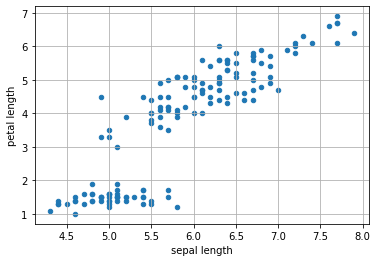

In [97]:
#scatter plot
df.plot(kind ="scatter",
          x ='sepal length',
          y ='petal length')
plt.grid()

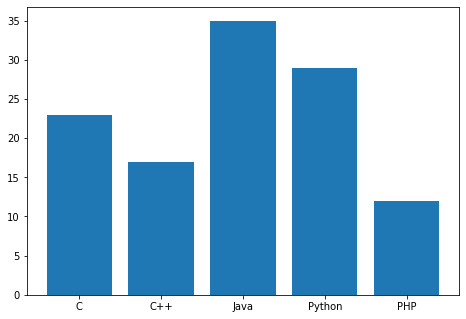

In [98]:
#bar plot
fig = plt.figure()
#left , bottom , w, h
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()

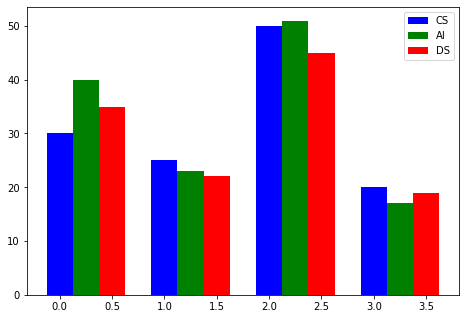

In [102]:
import numpy as np
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
ax.legend(labels=['CS', 'AI','DS'])
